### Data Info
Clustering the data collected by Sarah. The data are ratings of vignettes of shame/guilt/neutral. 
Gievn that there are a plenty of vignettes, each subject was asked to rate 1/3 of the total vignettes.

### Load packages

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

### Data Cleaning

In [57]:
# Load data & basic info
df0 = pd.read_csv(r"..\Data\AllParticipantsData.csv", sep=",", na_values = "#NULL!") # #NULL! -> NaN
#df0 = pd.read_csv("..\Data\AllParticipantsData.csv", skipinitialspace=True) # non-numerical inputs -> NaN, but failed?
df0.info()
df0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 3236 entries, SubID to MeanNeutral
dtypes: float64(3235), int64(1)
memory usage: 2.1 MB


,SubID,GuiltQ35_Fear,GuiltQ35_Nervousness,GuiltQ35_Sadness,GuiltQ35_Sympathy,GuiltQ35_Neglect,GuiltQ35_Shame,GuiltQ35_Guilt,GuiltQ35_Suffering,GuiltQ35_Torment,...,MeanPride,MeanContentment,MeanExcitement,MeanCheerfulness,MeanLonging,MeanLust,MeanShameVNeutral,MeanShameVAffection,MeanAffection,MeanNeutral
0,273949,1.0,2.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,...,1.18,1.64,1.18,1.41,2.14,1.00,1.08,1.17,1.42,1.28
1,292592,1.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,...,1.18,1.49,1.18,1.31,2.09,1.07,1.00,1.67,1.74,1.48
2,234366,2.0,2.0,4.0,4.0,1.0,3.0,3.0,2.0,3.0,...,1.15,1.59,1.03,1.03,1.03,1.00,1.00,1.00,1.02,2.02
3,986469,1.0,1.0,3.0,4.0,2.0,4.0,4.0,2.0,3.0,...,1.15,1.49,1.10,1.10,1.19,1.02,1.15,1.00,1.02,1.23
4,205611,1.0,2.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,...,1.22,1.46,1.15,1.18,1.73,1.03,1.54,1.15,1.25,1.99


In [58]:
# Select the columns of interest
filter_col = [col for col in df0 if col.startswith('GuiltQ35') ]
df = df0[filter_col]
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GuiltQ35_Fear          25 non-null     float64
 1   GuiltQ35_Nervousness   25 non-null     float64
 2   GuiltQ35_Sadness       25 non-null     float64
 3   GuiltQ35_Sympathy      25 non-null     float64
 4   GuiltQ35_Neglect       25 non-null     float64
 5   GuiltQ35_Shame         25 non-null     float64
 6   GuiltQ35_Guilt         25 non-null     float64
 7   GuiltQ35_Suffering     25 non-null     float64
 8   GuiltQ35_Torment       25 non-null     float64
 9   GuiltQ35_Envy          25 non-null     float64
 10  GuiltQ35_Disgust       25 non-null     float64
 11  GuiltQ35_Rage          25 non-null     float64
 12  GuiltQ35_Frustration   25 non-null     float64
 13  GuiltQ35_Irritation    25 non-null     float64
 14  GuiltQ35_Surprise      25 non-null     float64
 15  GuiltQ35

,GuiltQ35_Fear,GuiltQ35_Nervousness,GuiltQ35_Sadness,GuiltQ35_Sympathy,GuiltQ35_Neglect,GuiltQ35_Shame,GuiltQ35_Guilt,GuiltQ35_Suffering,GuiltQ35_Torment,GuiltQ35_Envy,...,GuiltQ35_Joy,GuiltQ35_Optimism,GuiltQ35_Pride,GuiltQ35_Contentment,GuiltQ35_Excitement,GuiltQ35_Cheerfulness,GuiltQ35_Longing,GuiltQ35_Lust,GuiltQ35_Affection,GuiltQ35_Neutral
0,1.0,2.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0
1,1.0,2.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,2.0,2.0,4.0,4.0,1.0,3.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,3.0,4.0,2.0,4.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
4,1.0,2.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
5,2.0,2.0,4.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

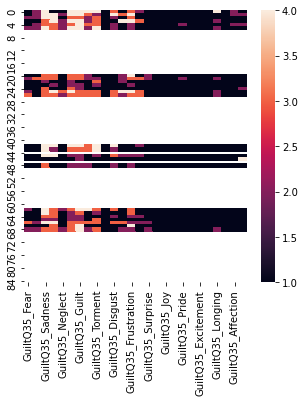

In [59]:
sns.heatmap(df)

In [60]:
# Remove rows with NaN
df.isnull().sum() # show the number of NaNs per column
df = df.dropna() # drop the rows of NaN
df.info()
df.mean().sort_values(ascending=False) # sort the values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 68
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GuiltQ35_Fear          25 non-null     float64
 1   GuiltQ35_Nervousness   25 non-null     float64
 2   GuiltQ35_Sadness       25 non-null     float64
 3   GuiltQ35_Sympathy      25 non-null     float64
 4   GuiltQ35_Neglect       25 non-null     float64
 5   GuiltQ35_Shame         25 non-null     float64
 6   GuiltQ35_Guilt         25 non-null     float64
 7   GuiltQ35_Suffering     25 non-null     float64
 8   GuiltQ35_Torment       25 non-null     float64
 9   GuiltQ35_Envy          25 non-null     float64
 10  GuiltQ35_Disgust       25 non-null     float64
 11  GuiltQ35_Rage          25 non-null     float64
 12  GuiltQ35_Frustration   25 non-null     float64
 13  GuiltQ35_Irritation    25 non-null     float64
 14  GuiltQ35_Surprise      25 non-null     float64
 15  GuiltQ35

GuiltQ35_Sadness         3.08
GuiltQ35_Guilt           3.00
GuiltQ35_Shame           2.88
GuiltQ35_Sympathy        2.76
GuiltQ35_Torment         2.48
GuiltQ35_Frustration     2.40
GuiltQ35_Suffering       2.08
GuiltQ35_Disgust         1.96
GuiltQ35_Rage            1.64
GuiltQ35_Irritation      1.52
GuiltQ35_Fear            1.40
GuiltQ35_Neglect         1.36
GuiltQ35_Longing         1.36
GuiltQ35_Nervousness     1.36
GuiltQ35_Neutral         1.24
GuiltQ35_Surprise        1.16
GuiltQ35_Affection       1.12
GuiltQ35_Pride           1.08
GuiltQ35_Relief          1.00
GuiltQ35_Joy             1.00
GuiltQ35_Optimism        1.00
GuiltQ35_Envy            1.00
GuiltQ35_Contentment     1.00
GuiltQ35_Excitement      1.00
GuiltQ35_Cheerfulness    1.00
GuiltQ35_Lust            1.00
dtype: float64

<AxesSubplot:>

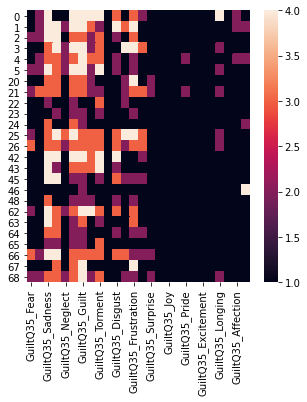

In [61]:
sns.heatmap(df)

[Text(0.5, 1.0, 'GuiltQ35'), Text(0.5, 0, 'Ratings'), Text(0, 0.5, 'Type')]

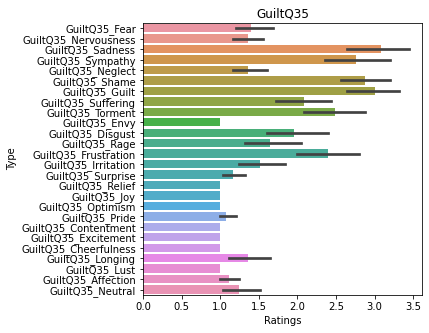

In [62]:
sns.barplot(data=df, orient="h").set(title="GuiltQ35", xlabel="Ratings", ylabel="Type")

### Analyses

In [63]:
# Names of questions
filter_col = [col for col in df0 if col.endswith('_Fear') ] # search for all columns ends with _Fear
names_question = [w.replace('_Fear','') for w in filter_col] # totally 120 questions
print('\nSample questions:\n',names_question[:20])

# Names of items/question
filter_col = [col for col in df0 if col.startswith(names_question[0]) ] # search for all columns starts with GuiltQ35
names_item = [w.replace(names_question[0]+'_','') for w in filter_col] # totally 26 items per question
print('\nItems per question:\n',names_item)


Sample questions:
 ['GuiltQ35', 'ShameQ113', 'NeutralQ77', 'ShameQ83', 'NeutralQ64', 'GuiltQ31', 'NeutralQ47', 'GuiltQ37', 'ShameQ95', 'NeutralQ61', 'ShameQ116', 'GuiltQ3', 'ShameQ101', 'GuiltQ29', 'NeutralQ57', 'GuiltQ2', 'NeutralQ46', 'ShameQ89', 'NeutralQ71', 'ShameQ87']

Items per question:
 ['Fear', 'Nervousness', 'Sadness', 'Sympathy', 'Neglect', 'Shame', 'Guilt', 'Suffering', 'Torment', 'Envy', 'Disgust', 'Rage', 'Frustration', 'Irritation', 'Surprise', 'Relief', 'Joy', 'Optimism', 'Pride', 'Contentment', 'Excitement', 'Cheerfulness', 'Longing', 'Lust', 'Affection', 'Neutral']


In [64]:
# Calculate values for each item and each question
for question in names_question:
    filter_col = [question + '_' + name for name in names_item] # all columns of a particular question
    df = df0[filter_col] # new df contain only the items associated with a particular question
    df = df.dropna() # drop the rows containing NaN
    
    #values = list(df.mean()/df.std()) # effect size
    values = list(df.median()) # median
    
    # new df1 to store the value per item (row) and per question (column)
    if question in names_question[0]:
        df1 = pd.DataFrame(values, columns=[question], index=names_item)
    else:
        df1[question] = values
        
df = df1.transpose() # new df: row = question, column = item
df

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
GuiltQ3,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ101,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ29,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
NeutralQ57,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0
GuiltQ2,1.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ShameQ92,3.0,2.5,4.0,3.0,1.0,4.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ5,2.0,3.0,4.0,4.0,1.5,3.0,3.5,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
NeutralQ41,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0
GuiltQ13,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [65]:
# Questions with the largest values of Shame
df.sort_values(by=['Shame','Guilt'], ascending=[False,True])[:5]

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
ShameQ112,1.0,1.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ119,2.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ103,1.0,2.0,3.0,1.0,1.0,4.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ShameQ91,2.0,1.0,4.0,3.0,2.0,4.0,4.0,3.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
ShameQ82,2.0,2.0,3.0,2.0,1.0,4.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [66]:
# Questions with the largest values of Guilt
df.sort_values(by=['Guilt','Shame'], ascending=[False,True])[:5]

,Fear,Nervousness,Sadness,Sympathy,Neglect,Shame,Guilt,Suffering,Torment,Envy,...,Joy,Optimism,Pride,Contentment,Excitement,Cheerfulness,Longing,Lust,Affection,Neutral
GuiltQ21,2.0,1.0,4.0,2.0,1.0,2.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ2,1.0,1.0,4.0,3.0,2.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ7,1.0,1.0,3.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ12,2.0,2.0,3.0,2.0,1.0,3.0,4.0,3.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
GuiltQ38,1.0,2.0,3.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
# Function of Radar (or Spider) plot
# codes from https://aakashkh.github.io/python/visualisation/2019/08/26/Plotting-Seaborn-Radar.html
def make_spider(df, row, color):
    
    categories=list(df) # feature (column) names of df
    N = len(categories) # number of features

    
    angles = [n / float(N) * 2 * np.pi for n in range(N)] # devide the circle into N sections
    angles += angles[:1] # a closed circle: last point == first point
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(np.pi / 2) # begins from (and also ends at) pi/2
    ax.set_theta_direction(-1) # clock-wise
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12) # ticks not include the last point (same as the first point)
    ax.tick_params(axis='x', rotation=15) # ticks horizantally displayed
    
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4], ["1","2","3","4"], color="black", size=10) # ticks along the radius
    plt.ylim(0,4)
 
    
    #values = df.reset_index().loc[row].values.tolist()[1:]
    #values = list(df.median()) #
    values = list(df.loc[row])
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.5)
    ax.legend(['ShameQ112','GuiltQ21'], loc='upper right', bbox_to_anchor=(1.4, 1.2))
 
  
    title = 'Radar Plot of 26 Items'
    plt.title(title, fontsize=24, x = 0.5, y = 1.1)

<ipython-input-67-5f94dfad4299>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,1,1, polar=True)


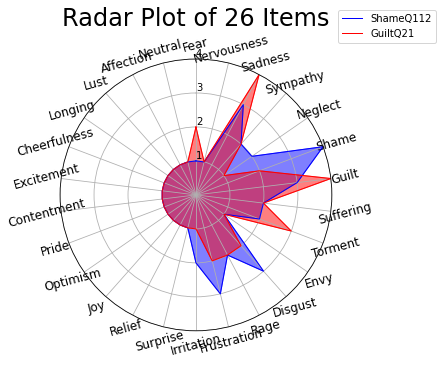

In [68]:
# Display the 2 questions with the largest Shame or Guilt ratings
plt.figure()
make_spider(row='ShameQ112', df=df, color='blue')#"#487eb0")
make_spider(row='GuiltQ21',  df=df, color='red')#"#e74c3c")

### Clustering

In [69]:
# Kmeans Clustering
from sklearn.cluster import KMeans
X = df.to_numpy() # pandas df to array， 109 * 26 array
clustering = KMeans(n_clusters=3, random_state=0).fit(X)
df1 = df # a copy of data
df1['label_kmeans'] = clustering.labels_ # save the labels into dataframe

# List the questions per cluster
list_label = np.unique(df1['label_kmeans'])
for label in list_label:
    print(f'\nlabel_kmeans={label}:\n', df1.loc[df1.label_kmeans==label].index)


label_kmeans=0:
 Index(['GuiltQ3', 'ShameQ101', 'GuiltQ29', 'ShameQ89', 'ShameQ87', 'GuiltQ34',
       'ShameQ100', 'ShameQ109', 'GuiltQ39', 'GuiltQ10', 'ShameQ102',
       'NeutralQ51', 'GuiltQ23', 'ShameQ108', 'ShameQ93', 'ShameQ99',
       'ShameQ88', 'ShameQ117', 'GuiltQ30', 'GuiltQ32', 'ShameQ84',
       'ShameQ107', 'GuiltQ6', 'GuiltQ40', 'ShameQ110', 'ShameQ81', 'GuiltQ17',
       'GuiltQ9', 'GuiltQ8', 'GuiltQ24', 'GuiltQ33', 'GuiltQ25'],
      dtype='object')

label_kmeans=1:
 Index(['NeutralQ57', 'NeutralQ46', 'NeutralQ71', 'NeutralQ48', 'NeutralQ50',
       'NeutralQ76', 'NeutralQ69', 'NeutralQ53', 'NeutralQ58', 'NeutralQ52',
       'NeutralQ78', 'NeutralQ67', 'NeutralQ63', 'NeutralQ45', 'NeutralQ54',
       'NeutralQ68', 'NeutralQ42', 'NeutralQ79', 'NeutralQ74', 'NeutralQ56',
       'NeutralQ75', 'NeutralQ49', 'NeutralQ73', 'NeutralQ43', 'NeutralQ62',
       'NeutralQ59', 'NeutralQ80', 'ShameQ86', 'NeutralQ60', 'NeutralQ70',
       'NeutralQ44', 'NeutralQ72', 'NeutralQ66', 

In [70]:
# Spectral Clustering
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(X)
df1 = df # a copy of data
df1['label_spectral'] = clustering.labels_ # save the labels into dataframe

# List the questions per cluster
list_label = np.unique(df1['label_spectral'])
for label in list_label:
    print(f'\nlabel_spectral={label}:\n', df1.loc[df1.label_spectral==label].index)


label_spectral=0:
 Index(['ShameQ112', 'GuiltQ19', 'ShameQ111', 'GuiltQ12', 'ShameQ91',
       'ShameQ120', 'ShameQ118', 'ShameQ96', 'GuiltQ15', 'ShameQ114',
       'ShameQ85', 'GuiltQ16', 'GuiltQ27', 'ShameQ119', 'ShameQ82', 'GuiltQ11',
       'GuiltQ36', 'ShameQ106', 'ShameQ90', 'GuiltQ26', 'ShameQ98', 'GuiltQ28',
       'ShameQ105', 'ShameQ92', 'GuiltQ5', 'GuiltQ13', 'ShameQ94'],
      dtype='object')

label_spectral=1:
 Index(['GuiltQ3', 'ShameQ101', 'GuiltQ29', 'GuiltQ2', 'ShameQ89', 'ShameQ87',
       'GuiltQ34', 'GuiltQ7', 'ShameQ100', 'GuiltQ22', 'ShameQ109', 'GuiltQ39',
       'GuiltQ10', 'ShameQ104', 'ShameQ102', 'GuiltQ20', 'ShameQ97',
       'NeutralQ51', 'GuiltQ23', 'ShameQ108', 'GuiltQ1', 'ShameQ93',
       'GuiltQ38', 'ShameQ99', 'ShameQ88', 'GuiltQ21', 'GuiltQ14', 'ShameQ115',
       'ShameQ103', 'GuiltQ4', 'ShameQ117', 'GuiltQ30', 'GuiltQ32', 'ShameQ84',
       'ShameQ107', 'GuiltQ6', 'GuiltQ40', 'ShameQ110', 'GuiltQ18', 'ShameQ81',
       'GuiltQ17', 'GuiltQ9', 'Guil